In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import sys
# sys.path.insert(0,"../crimdataAnalysisGraph.ipynb")
# from crimdataAnalysisGraph.ipynb import add_value_labels 

In [2]:
foreclosure = pd.read_csv("../../Joseph/Real_Merged_ForeClosure.csv")
foreclosure

,Unnamed: 0,RegisteredDate,PropertyType,PropertyAddress,PropertyCity,PropertyState,PropertyZip,CouncilDistrict,Area Name
0,0,1/2/2016,Single Family,"17725 W ORNA DR\nLOS ANGELES, CA 91344\n(34.29...",LOS ANGELES,CA,91344,12,Devonshire
1,1,1/7/2016,Single Family,"2695 N LA CUESTA DR\nLOS ANGELES, CA 90046\n(3...",LOS ANGELES,CA,90046,4,Wilshire
2,2,11/7/2016,Single Family,"841 W 148TH ST\nLOS ANGELES, CA 90247\n(33.898...",LOS ANGELES,CA,90247,15,Southeast
3,3,12/14/2016,Single Family,"11826 W SNELLING ST\nLOS ANGELES, CA 91352\n(3...",LOS ANGELES,CA,91352,6,Foothill
4,4,11/23/2016,Single Family,"17431 W EMILITA ST\nLOS ANGELES, CA 91316",LOS ANGELES,CA,91316,5,West Valley
5,5,11/21/2016,Single Family,"2912 E PENNSYLVANIA AVE\nLOS ANGELES, CA 90033...",LOS ANGELES,CA,90033,14,Hollenbeck
6,6,11/30/2016,Single Family,"2906 S HAUSER BLVD\nLOS ANGELES, CA 90016\n(34...",LOS ANGELES,CA,90016,10,Southwest
7,7,1/21/2016,Single Family,"20134 W LEADWELL\nLOS ANGELES, CA 91306",LOS ANGELES,CA,91306,3,Topanga
8,8,4/20/2016,Single Family,"5228 S MANHATTAN PL\nLOS ANGELES, CA 90062\n(3...",LOS ANGELES,CA,90062,8,77th Street
9,9,11/9/2016,Single Family,"12760 W BLYTHE ST\nLOS ANGELES, CA 91605\n(34....",LOS ANGELES,CA,91605,2,N Hollywood


In [3]:
property_group_df = pd.DataFrame(foreclosure)
property_group = property_group_df.groupby(property_group_df["PropertyType"])
property_group_count=property_group["PropertyType"].count()

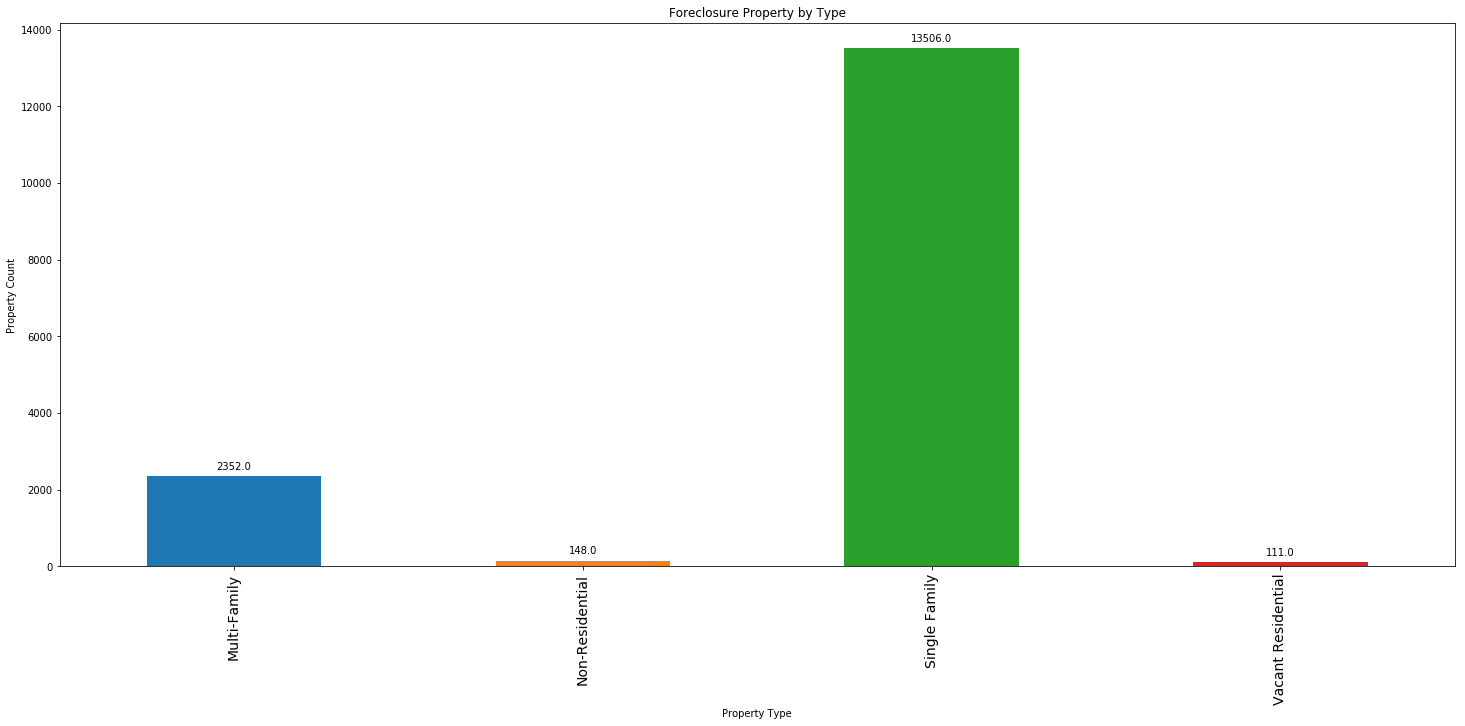

In [20]:
property_type_chart = property_group_count.plot(kind="bar",align="center")
plt.rcParams["figure.figsize"]=(25,10)
plt.title("Foreclosure Property by Type")
plt.xlabel("Property Type")
plt.ylabel("Property Count")
plt.rcParams['xtick.labelsize']=14

plt.xticks(rotation="vertical")

# creating function to add lebels to bar
def add_value_labels(property_type_chart, spacing=5):
   

    # For each bar: Place a label
    for rect in property_type_chart.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        property_type_chart.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(property_type_chart)
#add_value_labels(chart)
plt.savefig("foreclosurePropertyType.png")
plt.show()
